<a href="https://colab.research.google.com/github/Fvargasv/Challenge-Telecom-X-Parte-2/blob/main/Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación de los datos

##Extracción del archivo tratado

In [542]:
import pandas as pd

datos = pd.read_csv("/content/datos_telecomx_parte2.csv")
datos.head()

customerID  Churn customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO      0          Female                       0   
1  0003-MKNFE      0            Male                       0   
2  0004-TLHLJ      1            Male                       0   
3  0011-IGKFF      1            Male                       1   
4  0013-EXCHZ      1          Female                       1   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

  phone_MultipleLines internet_InternetService  ... internet_DeviceProtection  \
0                  No                      DSL  ...                        No   
1                 Yes                      DSL  ...                        No   
2                  No              Fiber optic  ...                       Yes   
3                  No              Fiber optic  ...                       Yes   
4                  No              Fiber optic  ...                        No   

  internet_TechSupport internet_StreamingTV internet_StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

         Contract PaperlessBilling     PaymentMethod  Charges_Monthly  \
0        One year                1      Mailed check             65.6   
1  Month-to-month                0      Mailed check             59.9   
2  Month-to-month                1  Electronic check             73.9   
3  Month-to-month                1  Electronic check             98.0   
4  Month-to-month                1      Mailed check             83.9   

  Charges_Total  Charges_Dayly  
0        593.30       2.186667  
1        542.40       1.996667  
2        280.85       2.463333  
3       1237.85       3.266667  
4        267.40       2.796667  

[5 rows x 22 columns]

##Eliminación de columnas irrelevantes

In [543]:
datos.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Charges_Dayly'],
      dtype='object')

In [544]:
#Eliminamos la columna customerID, ya que no entrega información útil que influya en la decisión de quedarse o irse de la compañía
datos = datos.drop(['customerID'], axis=1)
datos.head()

Churn customer_gender  customer_SeniorCitizen  customer_Partner  \
0      0          Female                       0                 1   
1      0            Male                       0                 0   
2      1            Male                       0                 0   
3      1            Male                       1                 1   
4      1          Female                       1                 1   

   customer_Dependents  customer_tenure  phone_PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone_MultipleLines internet_InternetService internet_OnlineSecurity  ...  \
0                  No                      DSL                      No  ...   
1                 Yes                      DSL                      No  ...   
2                  No              Fiber optic                      No  ...   
3                  No              Fiber optic                      No  ...   
4                  No              Fiber optic                      No  ...   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0                       No        One year                1      Mailed check   
1                      Yes  Month-to-month                0      Mailed check   
2                       No  Month-to-month                1  Electronic check   
3                      Yes  Month-to-month                1  Electronic check   
4                       No  Month-to-month                1      Mailed check   

  Charges_Monthly  Charges_Total  Charges_Dayly  
0            65.6         593.30       2.186667  
1            59.9         542.40       1.996667  
2            73.9         280.85       2.463333  
3            98.0        1237.85       3.266667  
4            83.9         267.40       2.796667  

[5 rows x 21 columns]

##Reducir redundancia

Se limpiarán los datos agrupando algunos valores de las variables, ya que se detectaron correlaciones de 1 en muchas variables, al hacer el encoding antes de separar las variables explicativas (X) de la objetivo (y)

In [545]:
datos_clean = datos.copy()
datos_clean.head()

Churn customer_gender  customer_SeniorCitizen  customer_Partner  \
0      0          Female                       0                 1   
1      0            Male                       0                 0   
2      1            Male                       0                 0   
3      1            Male                       1                 1   
4      1          Female                       1                 1   

   customer_Dependents  customer_tenure  phone_PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone_MultipleLines internet_InternetService internet_OnlineSecurity  ...  \
0                  No                      DSL                      No  ...   
1                 Yes                      DSL                      No  ...   
2                  No              Fiber optic                      No  ...   
3                  No              Fiber optic                      No  ...   
4                  No              Fiber optic                      No  ...   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0                       No        One year                1      Mailed check   
1                      Yes  Month-to-month                0      Mailed check   
2                       No  Month-to-month                1  Electronic check   
3                      Yes  Month-to-month                1  Electronic check   
4                       No  Month-to-month                1      Mailed check   

  Charges_Monthly  Charges_Total  Charges_Dayly  
0            65.6         593.30       2.186667  
1            59.9         542.40       1.996667  
2            73.9         280.85       2.463333  
3            98.0        1237.85       3.266667  
4            83.9         267.40       2.796667  

[5 rows x 21 columns]

In [546]:
cols_to_fix = ['internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies']

In [547]:
for col in cols_to_fix:
  datos_clean[col] = datos_clean[col].replace({'No internet service': 'No'})


In [548]:
#verificamos si hay valores únicos en cada columna
for col in datos_clean.columns:
  print(f"Valores únicos en la columna'{col}': {datos_clean[col].nunique()}")
  print(datos_clean[col].unique())
  print('-'*60)

Valores únicos en la columna'Churn': 2
[0 1]
------------------------------------------------------------
Valores únicos en la columna'customer_gender': 2
['Female' 'Male']
------------------------------------------------------------
Valores únicos en la columna'customer_SeniorCitizen': 2
[0 1]
------------------------------------------------------------
Valores únicos en la columna'customer_Partner': 2
[1 0]
------------------------------------------------------------
Valores únicos en la columna'customer_Dependents': 2
[1 0]
------------------------------------------------------------
Valores únicos en la columna'customer_tenure': 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
------------------------------------------------------------
Valores únicos en la columna'phone_PhoneService': 2
[1 0]
-------------

In [549]:
datos_clean.head()

Churn customer_gender  customer_SeniorCitizen  customer_Partner  \
0      0          Female                       0                 1   
1      0            Male                       0                 0   
2      1            Male                       0                 0   
3      1            Male                       1                 1   
4      1          Female                       1                 1   

   customer_Dependents  customer_tenure  phone_PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone_MultipleLines internet_InternetService internet_OnlineSecurity  ...  \
0                  No                      DSL                      No  ...   
1                 Yes                      DSL                      No  ...   
2                  No              Fiber optic                      No  ...   
3                  No              Fiber optic                      No  ...   
4                  No              Fiber optic                      No  ...   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
0                       No        One year                1      Mailed check   
1                      Yes  Month-to-month                0      Mailed check   
2                       No  Month-to-month                1  Electronic check   
3                      Yes  Month-to-month                1  Electronic check   
4                       No  Month-to-month                1      Mailed check   

  Charges_Monthly  Charges_Total  Charges_Dayly  
0            65.6         593.30       2.186667  
1            59.9         542.40       1.996667  
2            73.9         280.85       2.463333  
3            98.0        1237.85       3.266667  
4            83.9         267.40       2.796667  

[5 rows x 21 columns]

##Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.




In [550]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [551]:
columnas = datos_clean.columns
columnas

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Charges_Dayly'],
      dtype='object')

In [552]:
columnas_categoricas = datos.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['customer_gender', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [553]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['customer_gender', 'phone_MultipleLines', 'internet_InternetService',
                                   'internet_OnlineSecurity', 'internet_OnlineBackup',
                                    'internet_DeviceProtection', 'internet_TechSupport',
                                    'internet_StreamingTV', 'internet_StreamingMovies', 'Contract',
                                    'PaymentMethod']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [554]:
datos= one_hot.fit_transform(datos_clean)

In [555]:
datos=pd.DataFrame(datos, columns=one_hot.get_feature_names_out(columnas))
datos.head()

onehotencoder__customer_gender_Male  onehotencoder__phone_MultipleLines_No  \
0                                  0.0                                    1.0   
1                                  1.0                                    0.0   
2                                  1.0                                    1.0   
3                                  1.0                                    1.0   
4                                  0.0                                    1.0   

   onehotencoder__phone_MultipleLines_No phone service  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   onehotencoder__phone_MultipleLines_Yes  \
0                                     0.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   onehotencoder__internet_InternetService_DSL  \
0                                          1.0   
1                                          1.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   onehotencoder__internet_InternetService_Fiber optic  \
0                                                0.0     
1                                                0.0     
2                                                1.0     
3                                                1.0     
4                                                1.0     

   onehotencoder__internet_InternetService_No  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   onehotencoder__internet_OnlineSecurity_Yes  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   onehotencoder__internet_OnlineBackup_Yes  \
0                                       1.0   
1                                       0.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   

   onehotencoder__internet_DeviceProtection_Yes  ...  remainder__Churn  \
0                                           0.0  ...               0.0   
1                                           0.0  ...               0.0   
2                                           1.0  ...               1.0   
3                                           1.0  ...               1.0   
4                                           0.0  ...               1.0   

   remainder__customer_SeniorCitizen  remainder__customer_Partner  \
0                                0.0                          1.0   
1                                0.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

   remainder__customer_Dependents  remainder__customer_tenure  \
0                             1.0                         9.0   
1                             0.0                         9.0   
2                             0.0                         4.0   
3                             0.0                        13.0   
4                             0.0                         3.0   

   remainder__phone_PhoneService  remainder__PaperlessBilling  \
0                            1.0                         

In [556]:
#Se cambia el nombre de las columnas para mejor comprensión
datos.columns.to_list()

['onehotencoder__customer_gender_Male',
 'onehotencoder__phone_MultipleLines_No',
 'onehotencoder__phone_MultipleLines_No phone service',
 'onehotencoder__phone_MultipleLines_Yes',
 'onehotencoder__internet_InternetService_DSL',
 'onehotencoder__internet_InternetService_Fiber optic',
 'onehotencoder__internet_InternetService_No',
 'onehotencoder__internet_OnlineSecurity_Yes',
 'onehotencoder__internet_OnlineBackup_Yes',
 'onehotencoder__internet_DeviceProtection_Yes',
 'onehotencoder__internet_TechSupport_Yes',
 'onehotencoder__internet_StreamingTV_Yes',
 'onehotencoder__internet_StreamingMovies_Yes',
 'onehotencoder__Contract_Month-to-month',
 'onehotencoder__Contract_One year',
 'onehotencoder__Contract_Two year',
 'onehotencoder__PaymentMethod_Bank transfer (automatic)',
 'onehotencoder__PaymentMethod_Credit card (automatic)',
 'onehotencoder__PaymentMethod_Electronic check',
 'onehotencoder__PaymentMethod_Mailed check',
 'remainder__Churn',
 'remainder__customer_SeniorCitizen',
 'r

In [557]:
new_columns = ['customer_gender_Male',
 'phone_MultipleLines_No',
 'phone_MultipleLines_No phone service',
 'phone_MultipleLines_Yes',
 'internet_InternetService_DSL',
 'internet_InternetService_Fiber optic',
 'internet_InternetService_No',
 'internet_OnlineSecurity_Yes',
 'internet_OnlineBackup_Yes',
 'internet_DeviceProtection_Yes',
 'internet_TechSupport_Yes',
 'internet_StreamingTV_Yes',
 'internet_StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'Charges_Dayly']

In [558]:
datos.columns = ['customer_gender_Male',
 'phone_MultipleLines_No',
 'phone_MultipleLines_No phone service',
 'phone_MultipleLines_Yes',
 'internet_InternetService_DSL',
 'internet_InternetService_Fiber optic',
 'internet_InternetService_No',
 'internet_OnlineSecurity_Yes',
 'internet_OnlineBackup_Yes',
 'internet_DeviceProtection_Yes',
 'internet_TechSupport_Yes',
 'internet_StreamingTV_Yes',
 'internet_StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'Churn',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'Charges_Dayly']
datos.head()

customer_gender_Male  phone_MultipleLines_No  \
0                   0.0                     1.0   
1                   1.0                     0.0   
2                   1.0                     1.0   
3                   1.0                     1.0   
4                   0.0                     1.0   

   phone_MultipleLines_No phone service  phone_MultipleLines_Yes  \
0                                   0.0                      0.0   
1                                   0.0                      1.0   
2                                   0.0                      0.0   
3                                   0.0                      0.0   
4                                   0.0                      0.0   

   internet_InternetService_DSL  internet_InternetService_Fiber optic  \
0                           1.0                                   0.0   
1                           1.0                                   0.0   
2                           0.0                                   1.0   
3                           0.0                                   1.0   
4                           0.0                                   1.0   

   internet_InternetService_No  internet_OnlineSecurity_Yes  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   internet_OnlineBackup_Yes  internet_DeviceProtection_Yes  ...  Churn  \
0                        1.0                            0.0  ...    0.0   
1                        0.0                            0.0  ...    0.0   
2                        0.0                            1.0  ...    1.0   
3                        1.0                            1.0  ...    1.0   
4                        0.0                            0.0  ...    1.0   

   customer_SeniorCitizen  customer_Partner  customer_Dependents  \
0                     0.0               1.0                  1.0   
1                     0.0               0.0                  0.0   
2                     0.0               0.0                  0.0   
3                     1.0               1.0                  0.0   
4                     1.0               1.0                  0.0   

   customer_tenure  phone_PhoneService  PaperlessBilling  Charges_Monthly  \
0              9.0                 1.0               1.0             65.6   
1              9.0                 1.0               0.0             59.9   
2              4.0                 1.0               1.0             73.9   
3             13.0                 1.0               1.0             98.0   
4              3.0                 1.0               1.0             83.9   

   Charges_Total  Charges_Dayly  
0         593.30       2.186667  
1         542.40       1.996667  
2         280.85       2.463333  
3        1237.85       3.266667  
4         267.40       2.796667  

[5 rows x 30 columns]

In [559]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_gender_Male                     7043 non-null   float64
 1   phone_MultipleLines_No                   7043 non-null   float64
 2   phone_MultipleLines_No phone service     7043 non-null   float64
 3   phone_MultipleLines_Yes                  7043 non-null   float64
 4   internet_InternetService_DSL             7043 non-null   float64
 5   internet_InternetService_Fiber optic     7043 non-null   float64
 6   internet_InternetService_No              7043 non-null   float64
 7   internet_OnlineSecurity_Yes              7043 non-null   float64
 8   internet_OnlineBackup_Yes                7043 non-null   float64
 9   internet_DeviceProtection_Yes            7043 non-null   float64
 10  internet_TechSupport_Yes                 7043 no

In [560]:
print(datos.isna().sum())

customer_gender_Male                        0
phone_MultipleLines_No                      0
phone_MultipleLines_No phone service        0
phone_MultipleLines_Yes                     0
internet_InternetService_DSL                0
internet_InternetService_Fiber optic        0
internet_InternetService_No                 0
internet_OnlineSecurity_Yes                 0
internet_OnlineBackup_Yes                   0
internet_DeviceProtection_Yes               0
internet_TechSupport_Yes                    0
internet_StreamingTV_Yes                    0
internet_StreamingMovies_Yes                0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
Churn                                       0
customer_SeniorCitizen            

In [561]:
print(datos.isnull().sum())

customer_gender_Male                        0
phone_MultipleLines_No                      0
phone_MultipleLines_No phone service        0
phone_MultipleLines_Yes                     0
internet_InternetService_DSL                0
internet_InternetService_Fiber optic        0
internet_InternetService_No                 0
internet_OnlineSecurity_Yes                 0
internet_OnlineBackup_Yes                   0
internet_DeviceProtection_Yes               0
internet_TechSupport_Yes                    0
internet_StreamingTV_Yes                    0
internet_StreamingMovies_Yes                0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
Churn                                       0
customer_SeniorCitizen            

In [562]:
#botamos los registros que tienen datos nulos, ya que son sólo 11
datos = datos.dropna()

In [563]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_gender_Male                     7032 non-null   float64
 1   phone_MultipleLines_No                   7032 non-null   float64
 2   phone_MultipleLines_No phone service     7032 non-null   float64
 3   phone_MultipleLines_Yes                  7032 non-null   float64
 4   internet_InternetService_DSL             7032 non-null   float64
 5   internet_InternetService_Fiber optic     7032 non-null   float64
 6   internet_InternetService_No              7032 non-null   float64
 7   internet_OnlineSecurity_Yes              7032 non-null   float64
 8   internet_OnlineBackup_Yes                7032 non-null   float64
 9   internet_DeviceProtection_Yes            7032 non-null   float64
 10  internet_TechSupport_Yes                 7032 non-nul

In [564]:
#Verificación datos nulos
print(datos.isnull().sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [565]:
#verificación de datos infinitos
import numpy as np
print(np.isinf(datos).sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [566]:
#Varificación String vacias
print((datos=='').sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

In [567]:
#Verificación String espacios
print((datos==' ').sum())

customer_gender_Male                       0
phone_MultipleLines_No                     0
phone_MultipleLines_No phone service       0
phone_MultipleLines_Yes                    0
internet_InternetService_DSL               0
internet_InternetService_Fiber optic       0
internet_InternetService_No                0
internet_OnlineSecurity_Yes                0
internet_OnlineBackup_Yes                  0
internet_DeviceProtection_Yes              0
internet_TechSupport_Yes                   0
internet_StreamingTV_Yes                   0
internet_StreamingMovies_Yes               0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
Churn                                      0
customer_SeniorCitizen                     0
customer_P

##Análisis de correlación

<Axes: >

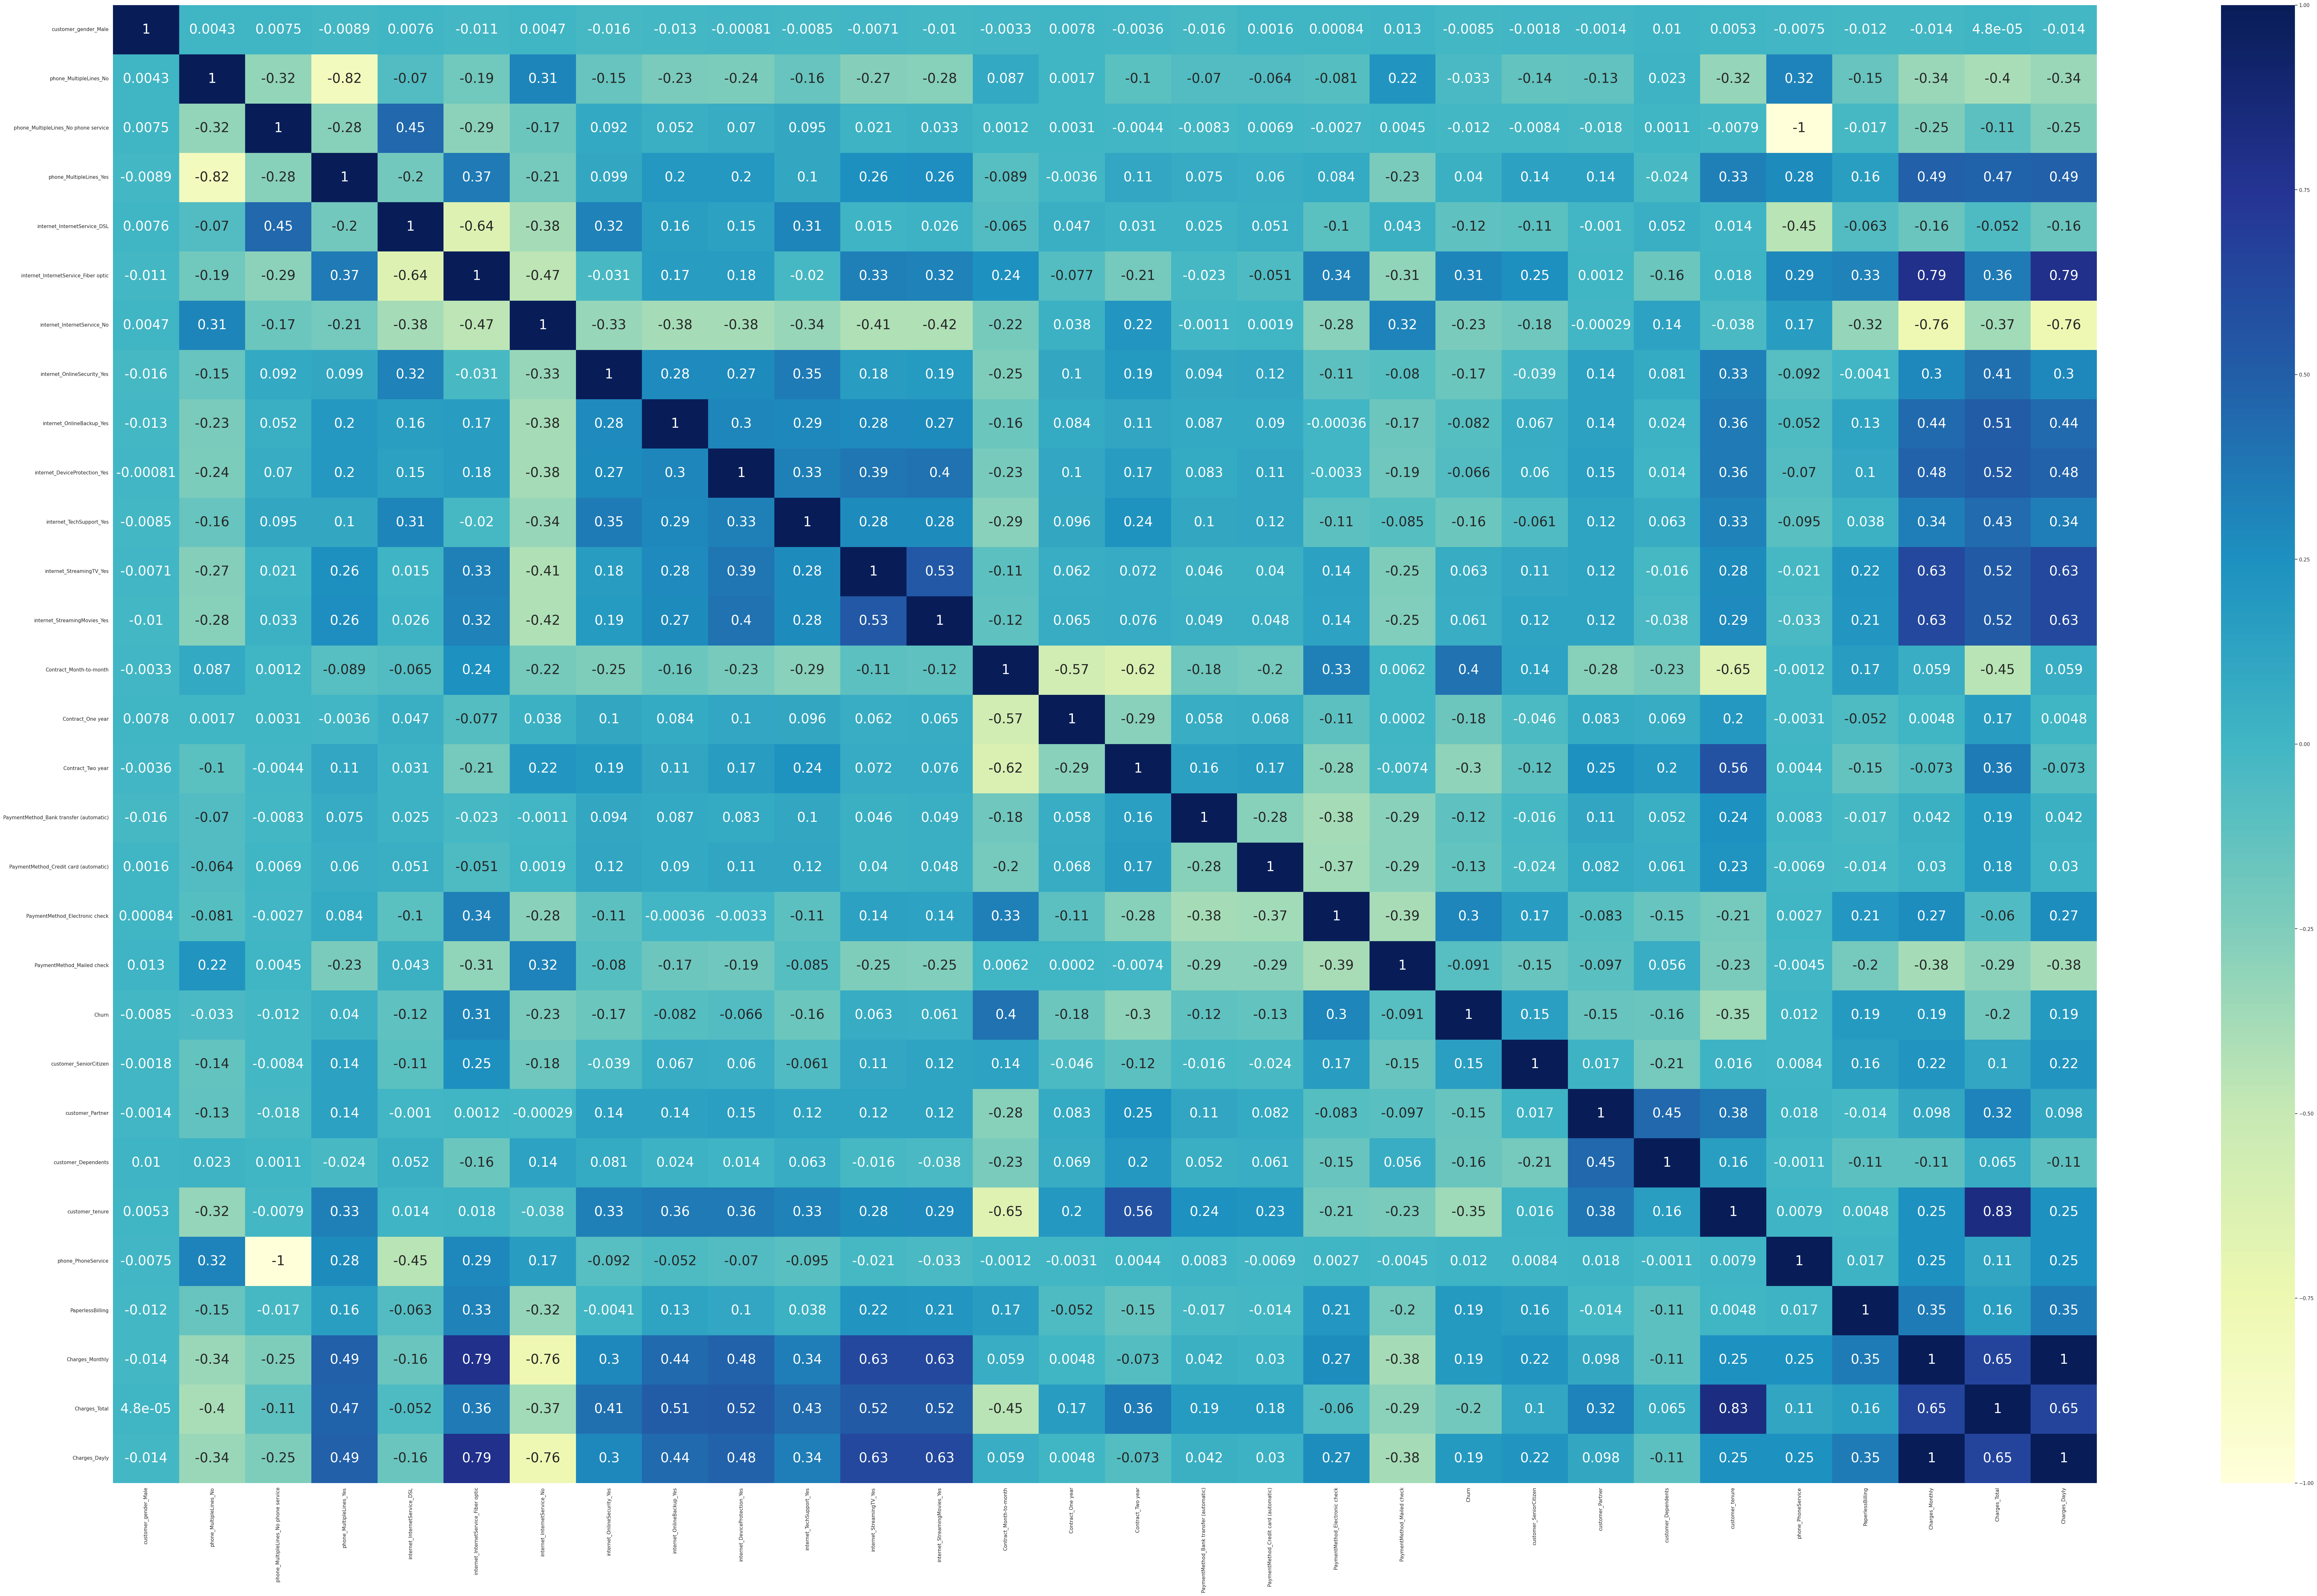

In [568]:
import seaborn as sns
sns.set(rc={'figure.figsize':(100,60)})
sns.heatmap(datos.corr(), annot=True, cmap="YlGnBu", annot_kws={"size": 30})

##Análisis de multicolinearidad entre variables

In [569]:
datos[['Charges_Dayly','Charges_Monthly']].corr()

Charges_Dayly  Charges_Monthly
Charges_Dayly              1.0              1.0
Charges_Monthly            1.0              1.0

In [570]:
#la variables 'Charges_Dayly'y 'Charges_Monthly' están correlacionadas perfectamente,por lo que debo eliminar 1 para evitar multicolinearidad
datos = datos.drop(['Charges_Monthly'], axis=1)
datos.head()

customer_gender_Male  phone_MultipleLines_No  \
0                   0.0                     1.0   
1                   1.0                     0.0   
2                   1.0                     1.0   
3                   1.0                     1.0   
4                   0.0                     1.0   

   phone_MultipleLines_No phone service  phone_MultipleLines_Yes  \
0                                   0.0                      0.0   
1                                   0.0                      1.0   
2                                   0.0                      0.0   
3                                   0.0                      0.0   
4                                   0.0                      0.0   

   internet_InternetService_DSL  internet_InternetService_Fiber optic  \
0                           1.0                                   0.0   
1                           1.0                                   0.0   
2                           0.0                                   1.0   
3                           0.0                                   1.0   
4                           0.0                                   1.0   

   internet_InternetService_No  internet_OnlineSecurity_Yes  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   internet_OnlineBackup_Yes  internet_DeviceProtection_Yes  ...  \
0                        1.0                            0.0  ...   
1                        0.0                            0.0  ...   
2                        0.0                            1.0  ...   
3                        1.0                            1.0  ...   
4                        0.0                            0.0  ...   

   PaymentMethod_Mailed check  Churn  customer_SeniorCitizen  \
0                         1.0    0.0                     0.0   
1                         1.0    0.0                     0.0   
2                         0.0    1.0                     0.0   
3                         0.0    1.0                     1.0   
4                         1.0    1.0                     1.0   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0               1.0                  1.0              9.0                 1.0   
1               0.0                  0.0              9.0                 1.0   
2               0.0                  0.0              4.0                 1.0   
3               1.0                  0.0             13.0                 1.0   
4               1.0                  0.0              3.0                 1.0   

   PaperlessBilling  Charges_Total  Charges_Dayly  
0               1.0         593.30       2.186667  
1               0.0         542.40       1.996667  
2               1.0         280.85       2.463333  
3               1.0        1237.85       3.266667  
4               1.0         267.40       2.796667  

[5 rows x 29 columns]

In [571]:
datos.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
internet_InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check             0.301455
Charges_Dayly                              0.192858
PaperlessBilling                           0.191454
customer_SeniorCitizen                     0.150541
internet_StreamingTV_Yes                   0.063254
internet_StreamingMovies_Yes               0.060860
phone_MultipleLines_Yes                    0.040033
phone_PhoneService                         0.011691
customer_gender_Male                      -0.008545
phone_MultipleLines_No phone service      -0.011691
phone_MultipleLines_No                    -0.032654
internet_DeviceProtection_Yes             -0.066193
internet_OnlineBackup_Yes                 -0.082307
PaymentMethod_Mailed check                -0.090773
PaymentMethod_Bank transfer (automatic)   -0.118136
internet_InternetService_DSL              -0.124141
PaymentMethod_Credit card (automatic)     -0.134687
customer_Partner                          -0.149982
customer_Dependents                       -0.163128
internet_TechSupport_Yes                  -0.164716
internet_OnlineSecurity_Yes               -0.171270
Contract_One year                         -0.178225
Charges_Total                             -0.199484
internet_InternetService_No               -0.227578
Contract_Two year                         -0.301552
customer_tenure                           -0.354049
Name: Churn, dtype: float64

##Variables explicativas y variable respuesta

In [572]:
X= datos.drop(['Churn'], axis=1)
y= datos['Churn']

In [573]:
X

customer_gender_Male  phone_MultipleLines_No  \
0                      0.0                     1.0   
1                      1.0                     0.0   
2                      1.0                     1.0   
3                      1.0                     1.0   
4                      0.0                     1.0   
...                    ...                     ...   
7038                   0.0                     1.0   
7039                   1.0                     0.0   
7040                   1.0                     1.0   
7041                   1.0                     1.0   
7042                   1.0                     0.0   

      phone_MultipleLines_No phone service  phone_MultipleLines_Yes  \
0                                      0.0                      0.0   
1                                      0.0                      1.0   
2                                      0.0                      0.0   
3                                      0.0                      0.0   
4                                      0.0                      0.0   
...                                    ...                      ...   
7038                                   0.0                      0.0   
7039                                   0.0                      1.0   
7040                                   0.0                      0.0   
7041                                   0.0                      0.0   
7042                                   1.0                      0.0   

      internet_InternetService_DSL  internet_InternetService_Fiber optic  \
0                              1.0                                   0.0   
1                              1.0                                   0.0   
2                              0.0                                   1.0   
3                              0.0                                   1.0   
4                              0.0                                   1.0   
...                            ...                                   ...   
7038                           1.0                                   0.0   
7039                           0.0                                   1.0   
7040                           1.0                                   0.0   
7041                           1.0                                   0.0   
7042                           1.0                                   0.0   

      internet_InternetService_No  internet_OnlineSecurity_Yes  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2                             0.0                          0.0   
3                             0.0                          0.0   
4                             0.0                          0.0   
...                           ...                          ...   
7038                          0.0                          1.0   
7039                          0.0                          0.0   
7040                          0.0                          0.0   
7041                          0.0                          1.0   
7042                          0.0                          1.0   

      internet_OnlineBackup_Yes  internet_DeviceProtection_Yes  ...  \
0                           1.0                            0.0  ...   
1                           0.0                            0.0  ...   
2                           0.0                            1.0  ...   
3                           1.0                            1.0  ...   
4                           0.0                            0.0  ...   
...                         ...                            ...  ...   
7038                        0.0                            0.0  ...   
7039                        0.0                            0.0  ...   
7040                        1.0                            0.0  ...   
7041                        0.0                            1.0  ...   
7042             

In [574]:
y

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
7038    0.0
7039    1.0
7040    0.0
7041    0.0
7042    0.0
Name: Churn, Length: 7032, dtype: float64

In [575]:
# utiliza el método LabelEncoder para realizar la transformación de
# la variable churn, ya que es CATEGORICA

#from sklearn.preprocessing import LabelEncoder

In [576]:
#label_encoder = LabelEncoder()

In [577]:
#y = label_encoder.fit_transform(y)

In [578]:
#y

In [579]:
#y.dtype

##Verificación de la Proporción de Cancelación (Churn)

In [580]:
datos['Churn'].value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [581]:
datos['Churn'].value_counts(normalize=True).round(2)

Churn
0.0    0.73
1.0    0.27
Name: proportion, dtype: float64

Se ve que hay un desbalance entre la proporción de clientes que cancelaron (27%) vs los que permanecen activos (73%)

##Balanceo de Clases

Se usará oversampling con el método SMOTE

In [582]:
from imblearn.over_sampling import SMOTE

In [583]:
oversampling = SMOTE(random_state=42)
X_balanceado, y_balanceado = oversampling.fit_resample(X,y)

In [584]:
y_balanceado.value_counts()

Churn
0.0    5163
1.0    5163
Name: count, dtype: int64

In [585]:
y_balanceado

0        0.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
10321    1.0
10322    1.0
10323    1.0
10324    1.0
10325    1.0
Name: Churn, Length: 10326, dtype: float64

##Normalización

Some algorithms that need data on the same scale: KNN (K-Nearest Neighbors), Neural Networks, Linear Regression, Logistic Regression and SVM.

Some algorithms that do not need data on the same scale: Decision Trees, Random Forest, AdaBoost, Naïve Bayes, etc.

Se utilizarán 3 modelos KNN, Decision Trees y Random Forest, por lo que se normalizarán los datos para usar KNN, esto debido a la diferencia de escala entre variables con valores 0 y 1 y la variable Charges_Total que tiene un máximo de 8684.


In [586]:
datos.describe()

customer_gender_Male  phone_MultipleLines_No  \
count           7032.000000             7032.000000   
mean               0.504693                0.481371   
std                0.500014                0.499688   
min                0.000000                0.000000   
25%                0.000000                0.000000   
50%                1.000000                0.000000   
75%                1.000000                1.000000   
max                1.000000                1.000000   

       phone_MultipleLines_No phone service  phone_MultipleLines_Yes  \
count                           7032.000000              7032.000000   
mean                               0.096701                 0.421928   
std                                0.295571                 0.493902   
min                                0.000000                 0.000000   
25%                                0.000000                 0.000000   
50%                                0.000000                 0.000000   
75%                                0.000000                 1.000000   
max                                1.000000                 1.000000   

       internet_InternetService_DSL  internet_InternetService_Fiber optic  \
count                   7032.000000                           7032.000000   
mean                       0.343572                              0.440273   
std                        0.474934                              0.496455   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        0.000000                              0.000000   
75%                        1.000000                              1.000000   
max                        1.000000                              1.000000   

       internet_InternetService_No  internet_OnlineSecurity_Yes  \
count                  7032.000000                  7032.000000   
mean                      0.216155                     0.286547   
std                       0.411650                     0.452180   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.000000                     1.000000   
max                       1.000000                     1.000000   

       internet_OnlineBackup_Yes  internet_DeviceProtection_Yes  ...  \
count                7032.000000                    7032.000000  ...   
mean                    0.344852                       0.343857  ...   
std                     0.475354                       0.475028  ...   
min                     0.000000                       0.000000  ...   
25%                     0.000000                       0.000000  ...   
50%                     0.000000                       0.000000  ...   
75%                     1.000000                       1.000000  ...   
max                     1.000000                       1.000000  ...   

       PaymentMethod_Mailed check        Churn  customer_SeniorCitizen  \
count                 7032.000000  7032.000000             7032.000000   
mean                     0.228100     0.265785                0.162400   
std                      0.419637     0.441782                0.368844   
min                      0.000000     0.000000                0.000000   
25%                      0.000000     0.000000                0.000000   
50%                      0.000000     0.000000                0.000000   
75%                      0.000000     1.000000                0.000000   
max                      1.000000     1.000000                1.000000   

       customer_Partner  customer_Dependents  customer_tenure  \
count       7032.000000          7032.000000      7032.000000   
mean           0.482509             0.298493        32.421786   
std            0.499729             0.457629        2

In [587]:
#normalización de la base de datos usando el MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler

In [588]:
normalizacion = MinMaxScaler()
X_balanceado_normalizado = normalizacion.fit_transform(X_balanceado)

In [589]:
X_balanceado_normalizado = pd.DataFrame(X_balanceado_normalizado)
X_balanceado_normalizado.columns = ['customer_gender_Male',
 'phone_MultipleLines_No',
 'phone_MultipleLines_No phone service',
 'phone_MultipleLines_Yes',
 'internet_InternetService_DSL',
 'internet_InternetService_Fiber optic',
 'internet_InternetService_No',
 'internet_OnlineSecurity_Yes',
 'internet_OnlineBackup_Yes',
 'internet_DeviceProtection_Yes',
 'internet_TechSupport_Yes',
 'internet_StreamingTV_Yes',
 'internet_StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'PaperlessBilling',
 'Charges_Total',
 'Charges_Dayly']
X_balanceado_normalizado.head()

customer_gender_Male  phone_MultipleLines_No  \
0                   0.0                     1.0   
1                   1.0                     0.0   
2                   1.0                     1.0   
3                   1.0                     1.0   
4                   0.0                     1.0   

   phone_MultipleLines_No phone service  phone_MultipleLines_Yes  \
0                                   0.0                      0.0   
1                                   0.0                      1.0   
2                                   0.0                      0.0   
3                                   0.0                      0.0   
4                                   0.0                      0.0   

   internet_InternetService_DSL  internet_InternetService_Fiber optic  \
0                           1.0                                   0.0   
1                           1.0                                   0.0   
2                           0.0                                   1.0   
3                           0.0                                   1.0   
4                           0.0                                   1.0   

   internet_InternetService_No  internet_OnlineSecurity_Yes  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   internet_OnlineBackup_Yes  internet_DeviceProtection_Yes  ...  \
0                        1.0                            0.0  ...   
1                        0.0                            0.0  ...   
2                        0.0                            1.0  ...   
3                        1.0                            1.0  ...   
4                        0.0                            0.0  ...   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                             0.0                         1.0   
1                             0.0                         1.0   
2                             1.0                         0.0   
3                             1.0                         0.0   
4                             0.0                         1.0   

   customer_SeniorCitizen  customer_Partner  customer_Dependents  \
0                     0.0               1.0                  1.0   
1                     0.0               0.0                  0.0   
2                     0.0               0.0                  0.0   
3                     1.0               1.0                  0.0   
4                     1.0               1.0                  0.0   

   customer_tenure  phone_PhoneService  PaperlessBilling  Charges_Total  \
0         0.112676                 1.0               1.0       0.066294   
1         0.112676                 1.0               0.0       0.060420   
2         0.042254                 1.0               1.0       0.030239   
3         0.169014                 1.0               1.0       0.140670   
4         0.028169                 1.0               1.0       0.028687   

   Charges_Dayly  
0       0.471144  
1       0.414428  
2       0.553731  
3       0.793532  
4       0.653234  

[5 rows x 28 columns]

#Correlación y Selección de Variables

##Análisis de Correlación

Este análisis fue realiado algunos pasos antes, debido a la fuerte colinealidad encontrada en las variables 'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies'

##Análisis Dirigido

Se investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

/tmp/ipython-input-3424777825.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x="Churn", y="customer_tenure", palette="Set2")


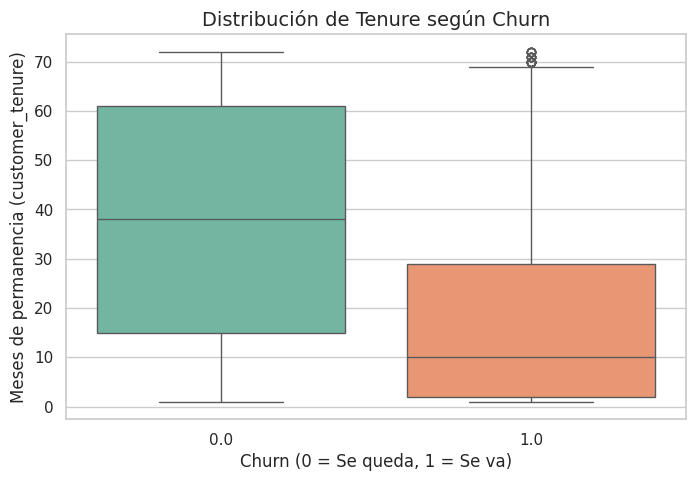

In [590]:
import matplotlib.pyplot as plt

# Ajustes generales de estilo
sns.set(style="whitegrid")

# --- 1. Boxplot: Churn vs customer_tenure ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos, x="Churn", y="customer_tenure", palette="Set2")
plt.title("Distribución de Tenure según Churn", fontsize=14)
plt.xlabel("Churn (0 = Se queda, 1 = Se va)")
plt.ylabel("Meses de permanencia (customer_tenure)")
plt.show()


Se observa que del gráfico Distribución de Tenure según Churn, el 75% de los clientes que se van, tienen hasta 29 meses de permanencia en la compañía, lo que sugiere que probablemente la estrategia de retención de clientes debería estar enfocada a los que tienen menos tiempo en la compañía.

/tmp/ipython-input-2553695704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x="Churn", y="Charges_Total", palette="Set2")


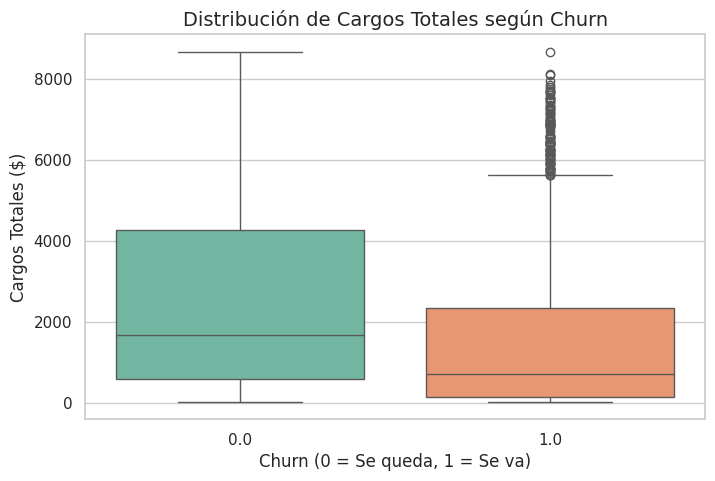

In [591]:
# --- 2. Boxplot: Churn vs Charges_Total ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos, x="Churn", y="Charges_Total", palette="Set2")
plt.title("Distribución de Cargos Totales según Churn", fontsize=14)
plt.xlabel("Churn (0 = Se queda, 1 = Se va)")
plt.ylabel("Cargos Totales ($)")
plt.show()

/tmp/ipython-input-2048597239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos, x="Churn", y="Charges_Dayly", palette="Set2")


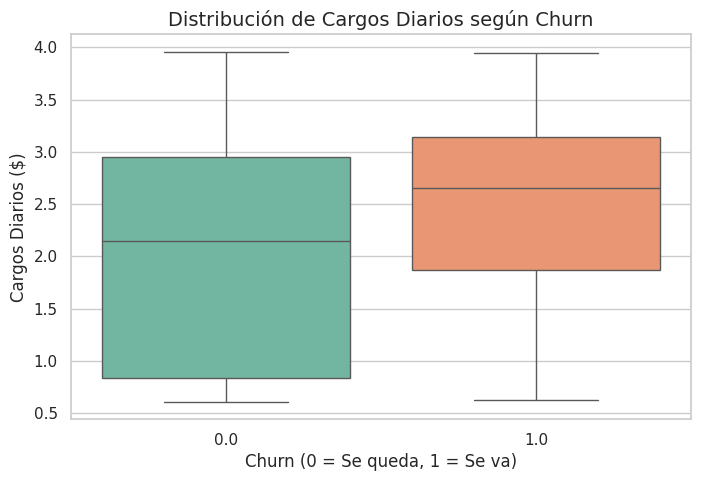

In [592]:
# --- 3. Boxplot: Churn vs Charges_Dayly ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos, x="Churn", y="Charges_Dayly", palette="Set2")
plt.title("Distribución de Cargos Diarios según Churn", fontsize=14)
plt.xlabel("Churn (0 = Se queda, 1 = Se va)")
plt.ylabel("Cargos Diarios ($)")
plt.show()

Se observa que los clientes que se van, tienen una mediana de cobro diario más alta que los clientes que se quedan y el 25% de los clientes que se van pagan diariamente \$1.9 vs el 25% de los que se quedan que pagan diariamente hasta \$0.8. Por lo que se podría inferir, que los clientes que se van diariamente están pagando más y quizás sea bueno enfocar la estrategia de retención asociada la disminución del cobro diario de los clientes más nuevos y así retenerlos.

Una propuesta podría ser cobrar más barato por un período determinado de tiempo y luego cobrar el precio normal por los servicios.

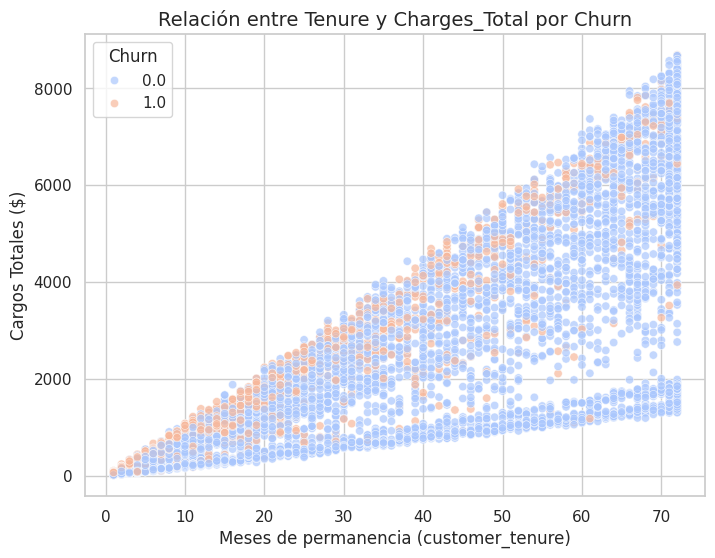

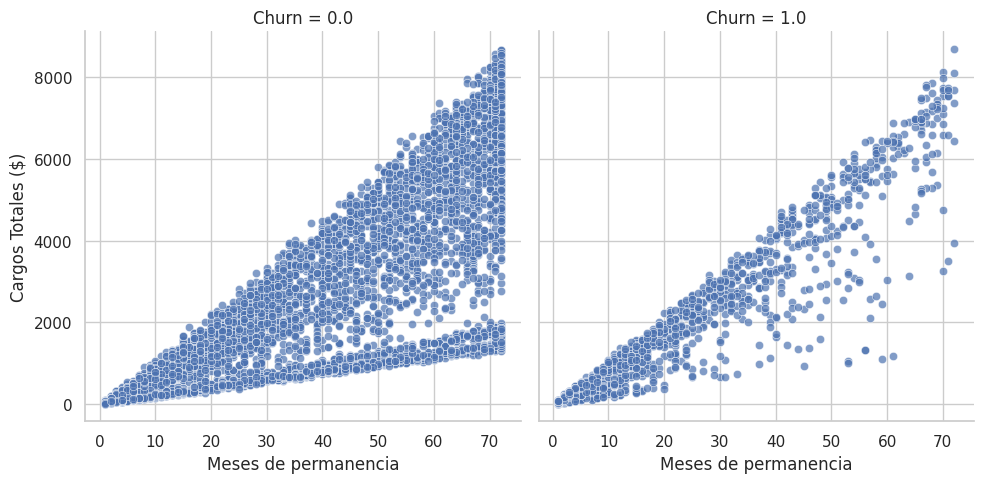

In [593]:
# --- 4. Gráfico de dispersión: customer_tenure vs Charges_Total con color por Churn ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=datos,
    x="customer_tenure",
    y="Charges_Total",
    hue="Churn",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Relación entre Tenure y Charges_Total por Churn", fontsize=14)
plt.xlabel("Meses de permanencia (customer_tenure)")
plt.ylabel("Cargos Totales ($)")
plt.legend(title="Churn")
plt.show()

# --- 4. Scatterplot separado por Churn (facetas) ---
g = sns.FacetGrid(datos, col="Churn", height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x="customer_tenure", y="Charges_Total", alpha=0.7)
g.set_axis_labels("Meses de permanencia", "Cargos Totales ($)")
g.set_titles("Churn = {col_name}")
plt.show()

#Modelado predictivo

##Separación de datos

In [594]:
#Separacion de los datos entre conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [595]:
X_train, X_test, y_train, y_test = train_test_split(X_balanceado, y_balanceado, train_size= 0.7, stratify =y_balanceado, random_state=5)

##Creación de Modelos

### Modelo base con DummyClassifier

In [596]:
#Se crea un modelo de clasificación base con el DummyClassifier y se da la tasa de acierto con el método score.
from sklearn.dummy import DummyClassifier

In [597]:
baseline = DummyClassifier()
baseline.fit(X_train, y_train)

baseline.score(X_test, y_test)

0.5

In [598]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_dummy = baseline.predict(X_test)

In [599]:
#creo una función para calcular las métricas del modelo

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test, y_pred)**(1/2)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {
      'RMSE':round(rmse,2),
      'MAE':round(mae,2),
      'R2':round(r2,2)
  }
  return metricas

In [600]:
resultados_baseline = calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 0.71, 'MAE': 0.5, 'R2': -1.0}

In [601]:
from sklearn.metrics import classification_report

In [602]:
print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      1549
         1.0       0.00      0.00      0.00      1549

    accuracy                           0.50      3098
   macro avg       0.25      0.50      0.33      3098
weighted avg       0.25      0.50      0.33      3098



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Modelo Decision Tree

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

In [603]:
from sklearn.tree import DecisionTreeClassifier

In [604]:
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=5)

In [605]:
#Accuracy o Exactitud con los  datos de entrenamiento
modelo_arbol.score(X_train,y_train)

0.8219424460431655

In [606]:
y_pred_DT = modelo_arbol.predict(X_test)
y_pred_DT

array([0., 1., 1., ..., 0., 1., 1.])

In [607]:
resultados_DecisionTree = calcular_regresion(y_test,y_pred_DT)
resultados_DecisionTree

{'RMSE': 0.43, 'MAE': 0.19, 'R2': 0.25}

In [608]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81      1549
         1.0       0.79      0.85      0.82      1549

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



####Matriz de confusión modelo DecisionTree



In [609]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [640]:
matriz_confusion_1 = confusion_matrix(y_test, y_pred_DT)
print(matriz_confusion_1)

[[1209  340]
 [ 239 1310]]


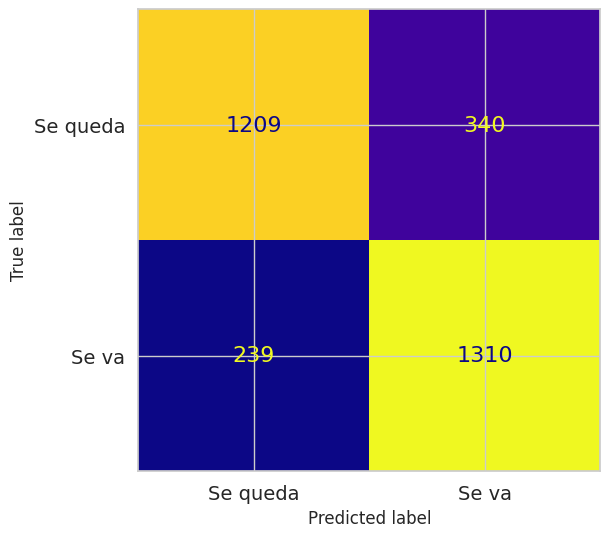

In [641]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_1, display_labels= ['Se queda','Se va'])

fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño del marco
visualizacion.plot(ax=ax, cmap="plasma", colorbar=False)

# Ajustar tamaño de etiquetas de ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajustar tamaño de los números dentro de las celdas
for text in visualizacion.ax_.texts:
    text.set_fontsize(16)

plt.show()

####Validación cruzada

In [612]:
from sklearn.model_selection import KFold, cross_validate

In [613]:
modelo_arbol_cv = DecisionTreeClassifier(max_depth=5,random_state=5)
kf = KFold(n_splits=5, shuffle= True, random_state=5)
cv_resultados = cross_validate(modelo_arbol_cv, X_balanceado, y_balanceado, cv=kf)
cv_resultados

{'fit_time': array([0.04649591, 0.04318881, 0.04036975, 0.0415926 , 0.04038167]),
 'score_time': array([0.00387979, 0.00365138, 0.00378108, 0.00343657, 0.00544095]),
 'test_score': array([0.82042594, 0.80532688, 0.80290557, 0.82324455, 0.81937046])}

In [614]:
cv_resultados['test_score']

array([0.82042594, 0.80532688, 0.80290557, 0.82324455, 0.81937046])

In [615]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de la exactitud del modelo es: {promedio}')
print(f'El desvío típico es: {desvio_std}')
print(f'El intervalo de confianza es: [{promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}]')

El promedio de la exactitud del modelo es: 0.8142546802959949
El desvío típico es: 0.008409298402232137
El intervalo de confianza es: [0.7974360834915306,0.8310732771004592]


###Modelo Random Forest

In [616]:
from sklearn.ensemble import RandomForestRegressor

In [617]:
modelo_rf = RandomForestRegressor(max_depth =10,random_state=5)
modelo_rf.fit(X_train,y_train) #ajuste de los datos

RandomForestRegressor(max_depth=10, random_state=5)

In [618]:
modelo_rf.score(X_train,y_train)

0.7538821882387812

In [619]:
y_pred_rf = modelo_rf.predict(X_test)
y_pred_rf

array([0.19150313, 0.4539496 , 0.69194709, ..., 0.13946085, 0.99528766,
       0.66770262])

In [620]:
#print(classification_report(y_test, y_pred_rf))

El error se debe a que RandomForestRegressor es un modelo para problemas de regresión, es decir, para predecir valores continuos (números decimales).

Como tu variable Churn es binaria (0 = se queda, 1 = se va), el problema es de clasificación, no de regresión.

###Modelo KNN

####Normalización

Los modelos de Regresión Logística / KNN, son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Por lo que se normalizarán los datos de entrenamiento X_train e y_train

In [621]:
from sklearn.preprocessing import MinMaxScaler

In [622]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train) #X_train ya está balanceado

In [623]:
X_train_normalizado = pd.DataFrame(X_train_normalizado)
X_train_normalizado.columns = ['customer_gender_Male',
 'phone_MultipleLines_No',
 'phone_MultipleLines_No phone service',
 'phone_MultipleLines_Yes',
 'internet_InternetService_DSL',
 'internet_InternetService_Fiber optic',
 'internet_InternetService_No',
 'internet_OnlineSecurity_Yes',
 'internet_OnlineBackup_Yes',
 'internet_DeviceProtection_Yes',
 'internet_TechSupport_Yes',
 'internet_StreamingTV_Yes',
 'internet_StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'PaperlessBilling',
 'Charges_Total',
 'Charges_Dayly']
X_train_normalizado.head()

customer_gender_Male  phone_MultipleLines_No  \
0                   0.0                     0.0   
1                   0.0                     0.0   
2                   1.0                     1.0   
3                   1.0                     0.0   
4                   0.0                     0.0   

   phone_MultipleLines_No phone service  phone_MultipleLines_Yes  \
0                                   0.0                      1.0   
1                                   0.0                      1.0   
2                                   0.0                      0.0   
3                                   0.0                      1.0   
4                                   0.0                      1.0   

   internet_InternetService_DSL  internet_InternetService_Fiber optic  \
0                           0.0                                   0.0   
1                           0.0                                   1.0   
2                           0.0                                   1.0   
3                           0.0                                   1.0   
4                           0.0                                   1.0   

   internet_InternetService_No  internet_OnlineSecurity_Yes  \
0                          1.0                          0.0   
1                          0.0                          1.0   
2                          0.0                          0.0   
3                          0.0                          1.0   
4                          0.0                          0.0   

   internet_OnlineBackup_Yes  internet_DeviceProtection_Yes  ...  \
0                        0.0                            0.0  ...   
1                        1.0                            1.0  ...   
2                        0.0                            0.0  ...   
3                        0.0                            1.0  ...   
4                        0.0                            0.0  ...   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0                             1.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             1.0                         0.0   
4                             0.0                         0.0   

   customer_SeniorCitizen  customer_Partner  customer_Dependents  \
0                     0.0               1.0                  0.0   
1                     0.0               1.0                  0.0   
2                     0.0               0.0                  0.0   
3                     0.0               1.0                  1.0   
4                     0.0               0.0                  0.0   

   customer_tenure  phone_PhoneService  PaperlessBilling  Charges_Total  \
0         0.577465                 1.0               0.0       0.125700   
1         1.000000                 1.0               0.0       0.917048   
2         0.211268                 1.0               1.0       0.132889   
3         0.422535                 1.0               0.0       0.323579   
4         0.112676                 1.0               1.0       0.070962   

   Charges_Dayly  
0       0.068261  
1       0.933732  
2       0.559542  
3       0.706527  
4       0.566019  

[5 rows x 28 columns]

In [624]:
# Se crea un modelo KNN usando el KNeighborsClassifier con los datos normalizados
#y se evalúa el rendimiento en los datos de prueba, también normalizados
from sklearn.neighbors import KNeighborsClassifier


In [625]:
knn = KNeighborsClassifier()

In [626]:
knn.fit(X_train_normalizado, y_train) #y_train no se normaliza porque son 0 y 1

KNeighborsClassifier()

In [627]:
X_test.head() #estos datos de prueba NO están normalizados

customer_gender_Male  phone_MultipleLines_No  \
4506                0.00000                1.000000   
2189                0.00000                1.000000   
10224               0.02115                1.000000   
10161               1.00000                0.874766   
5654                1.00000                0.000000   

       phone_MultipleLines_No phone service  phone_MultipleLines_Yes  \
4506                                    0.0                 0.000000   
2189                                    0.0                 0.000000   
10224                                   0.0                 0.000000   
10161                                   0.0                 0.125234   
5654                                    1.0                 0.000000   

       internet_InternetService_DSL  internet_InternetService_Fiber optic  \
4506                            1.0                                   0.0   
2189                            1.0                                   0.0   
10224                           1.0                                   0.0   
10161                           0.0                                   1.0   
5654                            1.0                                   0.0   

       internet_InternetService_No  internet_OnlineSecurity_Yes  \
4506                           0.0                          1.0   
2189                           0.0                          0.0   
10224                          0.0                          0.0   
10161                          0.0                          0.0   
5654                           0.0                          1.0   

       internet_OnlineBackup_Yes  internet_DeviceProtection_Yes  ...  \
4506                         0.0                       1.000000  ...   
2189                         0.0                       0.000000  ...   
10224                        0.0                       0.000000  ...   
10161                        0.0                       0.125234  ...   
5654                         0.0                       0.000000  ...   

       PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
4506                         0.000000                     1.00000   
2189                         1.000000                     0.00000   
10224                        0.000000                     0.97885   
10161                        0.874766                     0.00000   
5654                         1.000000                     0.00000   

       customer_SeniorCitizen  customer_Partner  customer_Dependents  \
4506                      0.0               1.0                  1.0   
2189                      0.0               1.0                  0.0   
10224                     0.0               0.0                  0.0   
10161                     0.0               0.0                  0.0   
5654                      0.0               1.0                  1.0   

       customer_tenure  phone_PhoneService  PaperlessBilling  Charges_Total  \
4506         13.000000                 1.0               1.0     816.800000   
2189          6.000000                 1.0               1.0     270.800000   
10224         3.978850                 1.0               0.0     191.000298   
10161         8.749532                 1.0               1.0     713.087477   
5654         49.000000                 0.0               1.0    1838.150000   

       Charges_Dayly  
4506        2.105000  
2189        1.638333  
10224       1.527130  
10161       2.765343  
5654        1.306667  

[5 rows x 28 columns]

In [628]:
#Se normalizan los datos de prueba
X_test_normalizado = pd.DataFrame(normalizacion.transform(X_test))
X_test_normalizado.head()

0         1    2         3    4    5    6    7    8         9   ...  \
0  0.00000  1.000000  0.0  0.000000  1.0  0.0  0.0  1.0  0.0  1.000000  ...   
1  0.00000  1.000000  0.0  0.000000  1.0  0.0  0.0  0.0  0.0  0.000000  ...   
2  0.02115  1.000000  0.0  0.000000  1.0  0.0  0.0  0.0  0.0  0.000000  ...   
3  1.00000  0.874766  0.0  0.125234  0.0  1.0  0.0  0.0  0.0  0.125234  ...   
4  1.00000  0.000000  1.0  0.000000  1.0  0.0  0.0  1.0  0.0  0.000000  ...   

         18       19   20   21   22        23   24   25        26        27  
0  0.000000  1.00000  0.0  1.0  1.0  0.169014  1.0  1.0  0.092074  0.445939  
1  1.000000  0.00000  0.0  1.0  0.0  0.070423  1.0  1.0  0.029068  0.306428  
2  0.000000  0.97885  0.0  0.0  0.0  0.041956  1.0  0.0  0.019859  0.273183  
3  0.874766  0.00000  0.0  0.0  0.0  0.109148  1.0  1.0  0.080106  0.643351  
4  1.000000  0.00000  0.0  1.0  1.0  0.676056  0.0  1.0  0.209932  0.207275  

[5 rows x 28 columns]

In [629]:
#Obtenemos el R2 de la predicción
knn.score(X_test_normalizado, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7969657843770175

In [630]:
#Se hace la predicción
y_pred_knn = knn.predict(X_test_normalizado)
y_pred_knn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1., 1., 0., ..., 1., 1., 1.])

In [631]:
resultados_knn = calcular_regresion(y_test,y_pred_knn)
resultados_knn

{'RMSE': 0.45, 'MAE': 0.2, 'R2': 0.19}

In [632]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.88      0.69      0.77      1549
         1.0       0.74      0.91      0.82      1549

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.79      3098
weighted avg       0.81      0.80      0.79      3098



####Matriz de confusión modelo KNN

In [642]:
matriz_confusion_2 = confusion_matrix(y_test, y_pred_knn)
print(matriz_confusion_2)

[[1063  486]
 [ 143 1406]]


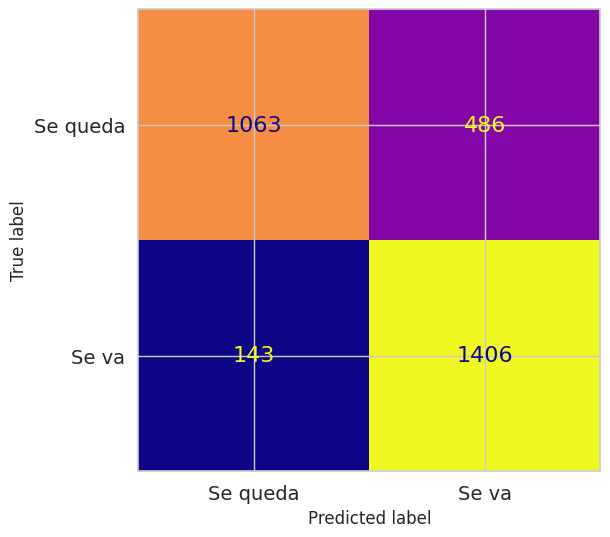

In [643]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion_2, display_labels= ['Se queda','Se va'])

fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño del marco
visualizacion.plot(ax=ax, cmap="plasma", colorbar=False)

# Ajustar tamaño de etiquetas de ejes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajustar tamaño de los números dentro de las celdas
for text in visualizacion.ax_.texts:
    text.set_fontsize(16)

plt.show()

##Evaluación de los Modelos


In [635]:
#Modelo Decision Tree: Accuracy o Exactitud con los  datos de entrenamiento
round(modelo_arbol.score(X_train,y_train),2)

0.82

In [636]:
#Modelo KNN: Accuracy o Exactitud con los  datos de entrenamiento
round(knn.score(X_train_normalizado,y_train),2)

0.84

In [637]:
#evalúa la tasa de acierto de los modelos DummyClassifier, DecisionTreeClassifier y KNeighborsClassifier
lista = [('baseline',baseline,X_test),('árbol decisión',modelo_arbol,X_test),('knn',knn,X_test_normalizado)]
for i in lista:
  print(f'La exactitud del modelo {i[0]}: {i[1].score(i[2],y_test):.2f}')

La exactitud del modelo baseline: 0.50
La exactitud del modelo árbol decisión: 0.81
La exactitud del modelo knn: 0.80


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


###Evaluación Modelo DecisionTree

In [638]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.81      1549
         1.0       0.79      0.85      0.82      1549

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



###Evaluación Modelo KNN

In [639]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.88      0.69      0.77      1549
         1.0       0.74      0.91      0.82      1549

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.79      3098
weighted avg       0.81      0.80      0.79      3098



###¿Qué modelo tuvo mejor desempeño?



* Primero el modelo DecisionTree y el knn son mejores que el modelo baseline.
* Exactitud: Ambos modelos con similares en la exactitud, siendo el modelo de árbol de decisión levemente superior con un 0.81 vs un 0.80 de exactitud del modelo knn.
* Precisión: Ambos llegaron a la misma, de un 0.81
* Precision clase 1: Mejor en Decision Tree 0.79 (menos falsos positivos).
* Recall: El recall del modelo de DecisionTree fue levemente mejor con un 0.81 vs 0.80 del modelo knn.
* Recall clase 1: Mejor en KNN con 0.91 (menos falsos negativos).
* F1-score: Lo mismo sucede con el f1-score, que el modelo DecisionTree obtuvo 0.81 vs 0.79 del modelo knn.


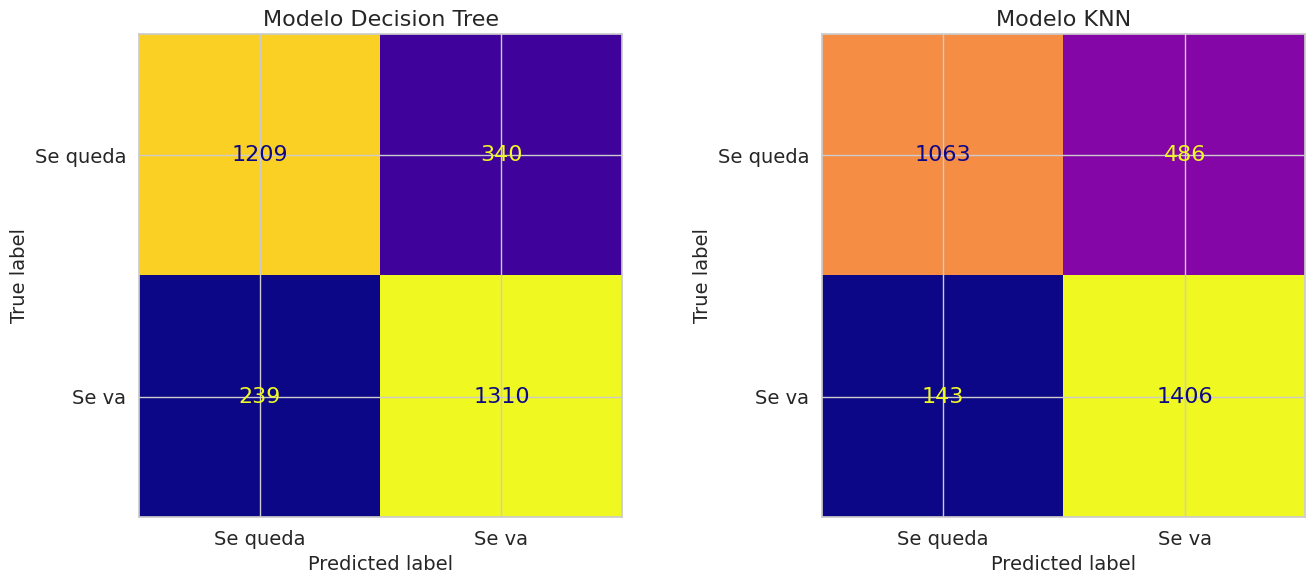

In [644]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Primera matriz
visualizacion1 = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_1,
    display_labels=['Se queda', 'Se va']
)
visualizacion1.plot(ax=axes[0], cmap="plasma", colorbar=False)
axes[0].set_title("Modelo Decision Tree", fontsize=16)

# Segunda matriz
visualizacion2 = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_2,
    display_labels=['Se queda', 'Se va']
)
visualizacion2.plot(ax=axes[1], cmap="plasma", colorbar=False)
axes[1].set_title("Modelo KNN", fontsize=16)

# Ajustar tamaño de etiquetas y números en ambas
for ax in axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(axis='both', labelsize=14)

# Ajustar números dentro de las celdas
for vis in [visualizacion1, visualizacion2]:
    for text in vis.ax_.texts:
        text.set_fontsize(16)

plt.tight_layout()
plt.show()

###¿Algún modelo presentó overfitting o underfitting?

| Modelo        | Accuracy Entrenamiento | Accuracy Test | Diferencia |
| ------------- | ---------------------- | ------------- | ---------- |
| Decision Tree | 0.82                   | 0.81          | 0.01       |
| KNN           | 0.84                   | 0.80          | 0.04       |



* Decision Tree: Diferencia muy pequeña no hay sobreajuste ni infraajuste evidente. Buen balance.

* KNN: Diferencia un poco mayor (4 puntos), pero sigue siendo aceptable. No parece overfitting grave, aunque podría estar capturando más patrones del set de entrenamiento que no generalizan tanto.

**Si queremos mejorar Decision Tree:**

* Ajustar max_depth, min_samples_split, y min_samples_leaf para buscar más recall.

* Probar ensambles como Random Forest o XGBoost.

**Si queremos mejorar KNN:**

* Optimizar n_neighbors.

* Normalizar o estandarizar los datos.

* Reducir dimensiones si hay muchas variables.

###Elección del modelo

* Decision Tree clasifica mejor sin “alertas falsas” (más precisión).

* KNN detecta más clientes que realmente se van (más recall).

Si en churn es más crítico detectar a todos los que se van (aunque haya algunos falsos positivos), KNN sería preferible.
Si se prioriza precisión en las alertas para no gastar recursos en clientes que no se irían, Decision Tree sería mejor.

Para este caso, es más importante identificar mejor a los clientes que se van, se quiere disminuir la evasión y suponemos que las restricciones presupuestarias, permiten gastar algo más en clientes que finalmente no se irán de la compañía.

Es por esto que el modelo seleccionado será el **KNN**

##Interpretación y Conclusiones

###Análisis de la Importancia de las Variables

In [651]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

In [645]:
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

# Supongamos que y_train y y_test ya están definidos

# 1. Ajustar modelo KNN base
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

# 2. Importancia de variables por Permutation Importance
result = permutation_importance(
    knn, X_test_normalizado, y_test,
    n_repeats=30, random_state=5
)

# Convertir a DataFrame ordenado
importancias = pd.DataFrame({
    "Variable": X_train_normalizado.columns,
    "Importancia": result.importances_mean
}).sort_values(by="Importancia", ascending=False)

print("Importancia de variables estimada (Permutation Importance):")
print(importancias)

# 3. Optimización para mejorar Recall y Accuracy
param_grid = {
    "n_neighbors": range(3, 21, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    scoring="recall",  # optimizamos para Recall
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_normalizado, y_train)

print("\nMejores hiperparámetros:", grid.best_params_)
print("Mejor Recall (CV):", grid.best_score_)

# 4. Evaluar modelo optimizado
mejor_knn = grid.best_estimator_
test_acc = mejor_knn.score(X_test_normalizado, y_test)
print("Accuracy en test:", test_acc)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/pytho

Importancia de variables estimada (Permutation Importance):
                                   Variable  Importancia
25                         PaperlessBilling     0.019539
18           PaymentMethod_Electronic check     0.017334
23                          customer_tenure     0.016451
19               PaymentMethod_Mailed check     0.014999
0                      customer_gender_Male     0.014784
13                  Contract_Month-to-month     0.013944
26                            Charges_Total     0.009910
7               internet_OnlineSecurity_Yes     0.009555
8                 internet_OnlineBackup_Yes     0.009404
21                         customer_Partner     0.008834
16  PaymentMethod_Bank transfer (automatic)     0.008543
14                        Contract_One year     0.008382
6               internet_InternetService_No     0.007403
17    PaymentMethod_Credit card (automatic)     0.007209
4              internet_InternetService_DSL     0.007005
20                   custome

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
#Mejor Recall (CV): 0.9169883104791898
#Accuracy en test: 0.7682375726275016

In [646]:
y_pred_grid = grid.predict(X_test_normalizado)
y_pred_grid

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1., 1., 1., ..., 0., 1., 1.])

In [647]:
#Modelo KNN: Accuracy o Exactitud con los  datos de entrenamiento
round(grid.score(X_train_normalizado,y_train),2)

0.92

In [648]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

         0.0       0.88      0.62      0.73      1549
         1.0       0.71      0.91      0.80      1549

    accuracy                           0.77      3098
   macro avg       0.79      0.77      0.76      3098
weighted avg       0.79      0.77      0.76      3098



In [649]:
matriz_confusion_grid = confusion_matrix(y_test, y_pred_grid)
print(matriz_confusion_grid)

[[ 968  581]
 [ 137 1412]]


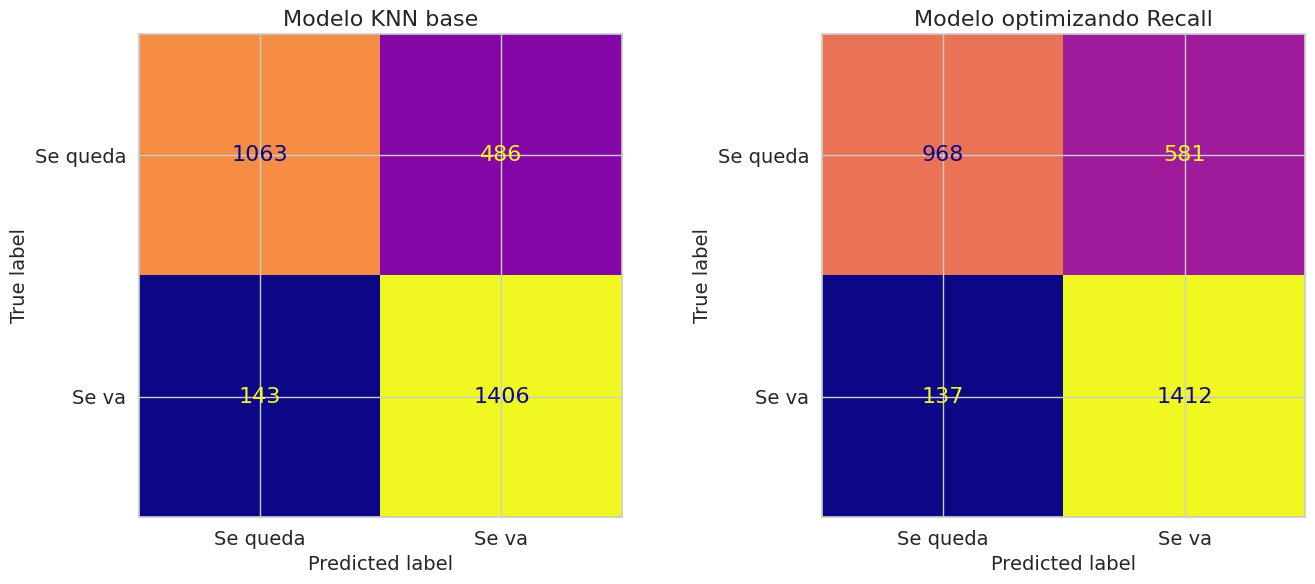

In [650]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Primera matriz
visualizacion1 = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_2,
    display_labels=['Se queda', 'Se va']
)
visualizacion1.plot(ax=axes[0], cmap="plasma", colorbar=False)
axes[0].set_title("Modelo KNN base", fontsize=16)

# Segunda matriz
visualizacion2 = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_grid,
    display_labels=['Se queda', 'Se va']
)
visualizacion2.plot(ax=axes[1], cmap="plasma", colorbar=False)
axes[1].set_title("Modelo optimizando Recall", fontsize=16)

# Ajustar tamaño de etiquetas y números en ambas
for ax in axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)
    ax.tick_params(axis='both', labelsize=14)

# Ajustar números dentro de las celdas
for vis in [visualizacion1, visualizacion2]:
    for text in vis.ax_.texts:
        text.set_fontsize(16)

plt.tight_layout()
plt.show()

##Conclusiones